In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.39216 stdev: 0.19749
Best fitness: 0.93875 - size: (2, 7) - species 1 - id 116
Average adjusted fitness: 0.347
Mean genetic distance 2.882, standard deviation 0.482
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 3.675 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.50593 stdev: 0.22252
Best fitness: 0.95229 - size: (3, 9) - species 17 - id 323
Average adjusted fitness: 0.500
Mean genetic distance 2.954, standard deviation 0.497
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.193 sec (3.934 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56523 stdev: 0.23263
Best fitness: 0.97099 - size: (2, 8) - species 20 - id 498
Average adjusted fitness: 0.515
Mean genetic distance 2.944, standard deviation 0.514
Population of 202 members in 27 species
Total extinctio

Population's average fitness: 0.55892 stdev: 0.12959
Best fitness: 0.96262 - size: (4, 11) - species 26 - id 806
Average adjusted fitness: 0.402
Mean genetic distance 2.864, standard deviation 0.493
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.801 sec (6.511 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55176 stdev: 0.12852
Best fitness: 0.96262 - size: (4, 11) - species 26 - id 806
Average adjusted fitness: 0.332
Mean genetic distance 2.869, standard deviation 0.487
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.797 sec (6.392 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56218 stdev: 0.13136
Best fitness: 0.96262 - size: (4, 11) - species 26 - id 806
Average adjusted fitness: 0.296
Mean genetic distance 2.916, standard deviation 0.490
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.895 sec (6.321 average)

 ****** Runn

Population's average fitness: 0.55966 stdev: 0.24831
Best fitness: 0.98252 - size: (5, 15) - species 21 - id 1413
Average adjusted fitness: 0.510
Mean genetic distance 2.978, standard deviation 0.528
Population of 206 members in 27 species
Total extinctions: 0
Generation time: 4.638 sec (4.804 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57998 stdev: 0.24418
Best fitness: 0.98252 - size: (5, 15) - species 21 - id 1413
Average adjusted fitness: 0.477
Mean genetic distance 2.976, standard deviation 0.518
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 4.676 sec (4.791 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56421 stdev: 0.25198
Best fitness: 0.98252 - size: (5, 15) - species 21 - id 1413
Average adjusted fitness: 0.467
Mean genetic distance 3.037, standard deviation 0.526
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 4.661 sec (4.918 average)

 ****** 

Population's average fitness: 0.56267 stdev: 0.22346
Best fitness: 0.94942 - size: (4, 11) - species 5 - id 1071
Average adjusted fitness: 0.323
Mean genetic distance 3.106, standard deviation 0.528
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 4.867 sec (5.121 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56816 stdev: 0.22849
Best fitness: 0.95006 - size: (5, 13) - species 5 - id 1999
Average adjusted fitness: 0.352
Mean genetic distance 3.104, standard deviation 0.515
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 5.068 sec (5.170 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57705 stdev: 0.22383
Best fitness: 0.95914 - size: (5, 14) - species 21 - id 2106
Average adjusted fitness: 0.401
Mean genetic distance 3.118, standard deviation 0.520
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 5.526 sec (5.231 average)

 ****** R


Population's average fitness: 0.61821 stdev: 0.20008
Best fitness: 0.98483 - size: (5, 15) - species 21 - id 2527
Average adjusted fitness: 0.575
Mean genetic distance 3.033, standard deviation 0.494
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.280 sec (6.925 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63141 stdev: 0.19268
Best fitness: 0.98483 - size: (5, 15) - species 21 - id 2527
Average adjusted fitness: 0.509
Mean genetic distance 3.078, standard deviation 0.505
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.545 sec (7.360 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62519 stdev: 0.18682
Best fitness: 0.98483 - size: (5, 15) - species 21 - id 2527
Average adjusted fitness: 0.390
Mean genetic distance 3.124, standard deviation 0.513
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.579 sec (7.592 average)

 ****

number of class1:479
number of class2:415

 ****** Running generation 0 ****** 

Population's average fitness: 0.48487 stdev: 0.17510
Best fitness: 0.95526 - size: (2, 7) - species 4 - id 40
Average adjusted fitness: 0.480
Mean genetic distance 2.836, standard deviation 0.474
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 2.224 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54909 stdev: 0.16478
Best fitness: 0.96756 - size: (3, 9) - species 1 - id 325
Average adjusted fitness: 0.398
Mean genetic distance 2.945, standard deviation 0.482
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 2.540 sec (2.382 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56906 stdev: 0.17647
Best fitness: 0.96756 - size: (3, 9) - species 1 - id 325
Average adjusted fitness: 0.518
Mean genetic distance 2.964, standard deviation 0.508
Population of 203 members in 26 species
Total extinctions: 

Population's average fitness: 0.57169 stdev: 0.14976
Best fitness: 0.92518 - size: (3, 9) - species 7 - id 354
Average adjusted fitness: 0.435
Mean genetic distance 3.024, standard deviation 0.564
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 2.567 sec (2.378 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58040 stdev: 0.15468
Best fitness: 0.92518 - size: (2, 9) - species 28 - id 542
Average adjusted fitness: 0.435
Mean genetic distance 3.059, standard deviation 0.561
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 2.656 sec (2.424 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59663 stdev: 0.16729
Best fitness: 0.92518 - size: (2, 9) - species 28 - id 542
Average adjusted fitness: 0.521
Mean genetic distance 3.040, standard deviation 0.543
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 2.713 sec (2.466 average)

 ****** Running 

Population's average fitness: 0.67534 stdev: 0.24008
Best fitness: 0.98616 - size: (4, 12) - species 9 - id 852
Average adjusted fitness: 0.592
Mean genetic distance 3.036, standard deviation 0.532
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.380 sec (4.096 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67632 stdev: 0.23291
Best fitness: 0.98616 - size: (4, 12) - species 9 - id 852
Average adjusted fitness: 0.591
Mean genetic distance 3.057, standard deviation 0.514
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 4.381 sec (4.124 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66802 stdev: 0.24930
Best fitness: 0.98616 - size: (4, 12) - species 9 - id 852
Average adjusted fitness: 0.589
Mean genetic distance 3.091, standard deviation 0.517
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 4.430 sec (4.240 average)

 ****** Runnin

Population's average fitness: 0.57626 stdev: 0.18187
Best fitness: 0.72238 - size: (3, 8) - species 16 - id 1905
Average adjusted fitness: 0.269
Mean genetic distance 3.047, standard deviation 0.495
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 4.446 sec (3.906 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56816 stdev: 0.18507
Best fitness: 0.72238 - size: (3, 8) - species 16 - id 1905
Average adjusted fitness: 0.257
Mean genetic distance 3.065, standard deviation 0.494
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 4.142 sec (3.965 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57180 stdev: 0.18450
Best fitness: 0.72238 - size: (3, 8) - species 16 - id 1905
Average adjusted fitness: 0.260
Mean genetic distance 3.057, standard deviation 0.491
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 4.179 sec (4.002 average)

 ****** Ru

Mean genetic distance 3.074, standard deviation 0.518
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.564 sec (4.458 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61609 stdev: 0.19759
Best fitness: 0.93431 - size: (3, 9) - species 11 - id 232
Average adjusted fitness: 0.495
Mean genetic distance 3.072, standard deviation 0.525
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 4.995 sec (4.564 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61311 stdev: 0.19559
Best fitness: 0.93431 - size: (3, 9) - species 11 - id 232
Average adjusted fitness: 0.439
Mean genetic distance 3.075, standard deviation 0.527
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 4.532 sec (4.619 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61647 stdev: 0.19570
Best fitness: 0.93431 - size: (3, 9) - species 11 - id 232
Averag

Population's average fitness: 0.52417 stdev: 0.05402
Best fitness: 0.81582 - size: (2, 7) - species 3 - id 2
Average adjusted fitness: 0.184
Mean genetic distance 3.018, standard deviation 0.491
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 2.436 sec (2.316 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52188 stdev: 0.06293
Best fitness: 0.81582 - size: (2, 7) - species 3 - id 2
Average adjusted fitness: 0.247
Mean genetic distance 3.040, standard deviation 0.485
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 2.615 sec (2.416 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53163 stdev: 0.07125
Best fitness: 0.81582 - size: (2, 7) - species 31 - id 2
Average adjusted fitness: 0.347
Mean genetic distance 3.037, standard deviation 0.465
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 2.676 sec (2.481 average)

 ****** Running generat

Population's average fitness: 0.64059 stdev: 0.15883
Best fitness: 0.71920 - size: (5, 12) - species 21 - id 954
Average adjusted fitness: 0.345
Mean genetic distance 2.948, standard deviation 0.572
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 3.895 sec (3.888 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61570 stdev: 0.17614
Best fitness: 0.71920 - size: (3, 9) - species 1 - id 1163
Average adjusted fitness: 0.329
Mean genetic distance 2.941, standard deviation 0.541
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 3.983 sec (3.902 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61657 stdev: 0.17809
Best fitness: 0.71920 - size: (3, 9) - species 18 - id 1163
Average adjusted fitness: 0.338
Mean genetic distance 2.972, standard deviation 0.551
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.039 sec (3.919 average)

 ****** Runni

Population's average fitness: 0.61471 stdev: 0.18424
Best fitness: 0.88793 - size: (4, 11) - species 36 - id 928
Average adjusted fitness: 0.433
Mean genetic distance 3.059, standard deviation 0.498
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 4.703 sec (4.416 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63516 stdev: 0.17535
Best fitness: 0.88793 - size: (4, 11) - species 36 - id 928
Average adjusted fitness: 0.467
Mean genetic distance 3.073, standard deviation 0.502
Population of 210 members in 41 species
Total extinctions: 0
Generation time: 4.893 sec (4.537 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61948 stdev: 0.18713
Best fitness: 0.88793 - size: (4, 11) - species 36 - id 928
Average adjusted fitness: 0.391
Mean genetic distance 3.089, standard deviation 0.510
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 5.020 sec (4.649 average)

 ****** Ru

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.7145

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[2] real:3
#9 index:[2] real:3
#10 index:[2] real:3
#11 index:[2 5] real:3
#12 index:[2] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[5] real:2
#24 index:[2] real:2
#25 index:[2] real:2
#26 index:[2] real:2
#27 index:[0 4] real:4
#28 index:[5] real:5
#29 index:[2] real:5
#30 index:[2] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[2] real:3
#38 index:[2] real:3
#39 index:[2 5] real:3
#40 index:[2 3 5] real:3
#41 index:[4] real:3
#42 index:[2] real:2
#43 index:[2] real:2
#44 index:[2] real:2
#45 index:[2] real:2
#46 index:[2] real:2
#47 index:[2]

#420 index:[1 4 5] real:1
#421 index:[5] real:2
#422 index:[2] real:2
#423 index:[2] real:2
#424 index:[2] real:2
#425 index:[2] real:2
#426 index:[2] real:2
#427 index:[2 5] real:5
#428 index:[5] real:4
#429 index:[4] real:4
#430 index:[4] real:4
#431 index:[5] real:4
#432 index:[4 5] real:5
#433 index:[2 5] real:5
#434 index:[4] real:5
#435 index:[4] real:5
#436 index:[4 5] real:5
#437 index:[2] real:5
#438 index:[2] real:2
#439 index:[2 5] real:2
#440 index:[5] real:2
#441 index:[5] real:2
#442 index:[5] real:3
#443 index:[2] real:3
#444 index:[1] real:1
#445 index:[1] real:1
#446 index:[1] real:1
#447 index:[1] real:1
#448 index:[1] real:1
#449 index:[2] real:2
#450 index:[2] real:2
#451 index:[2] real:2
#452 index:[5] real:2
#453 index:[5] real:5
#454 index:[4 5] real:5
#455 index:[2 5] real:4
#456 index:[5] real:4
#457 index:[5] real:4
#458 index:[4] real:4
#459 index:[2 4 5] real:4
#460 index:[4] real:4
#461 index:[2 4 5] real:4
#462 index:[4] real:4
#463 index:[4] real:4
#464 i

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[447   0   3   1  28   3]
 [  0 203   0   0   8   0]
 [ 12   0 371 163  14 188]
 [  0   0   1   8   0  15]
 [  2  17   0   7 147  11]
 [  0   4  22  32  40 253]]


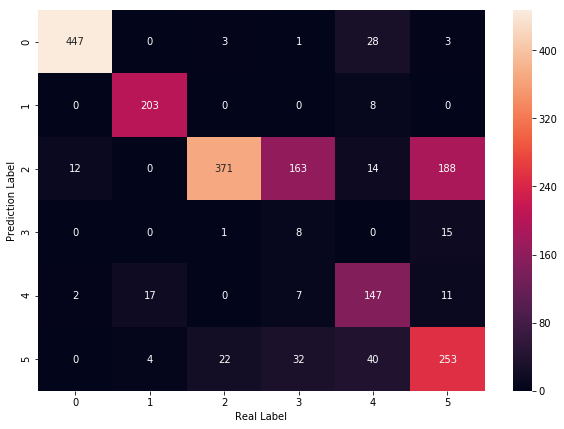

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()